# **Lógica Fuzzy**
> A Lógica Fuzzy (Nebulosa ou Difusa), comumente tratada como uma extensão da lógica booleana, é uma lógica multivalorada capaz de capturar informações vagas, em geral descritas em uma linguagem natural, e convertê-las para um formato numérico.
* Um valor lógico difuso, conhecido por grau de pertinência, é um valor qualquer no intervalo [0, 1].
  * Determina o grau em que um determinado elemento pertence a um conjunto, permitindo uma transição gradual da falsidade para a verdade.
  * Não existe uma base formal para determinar esse valor que é escolhido experimentalmente. 

> As implementações da lógica difusa permitem que estados não precisos possam ser tratados por dispositivos de controle.
 * Desse modo, é possível avaliar conceitos não quantificáveis.
 * Casos práticos: 
  * Avaliar a temperatura (quente, morno, frio, ...)
  * Sentimento de felicidade (radiante, feliz, apático,
triste, ...)

>O presente notebook colab, escrito por Alison Zille Lopes, introduz o desenvolvimento de Sistemas Fuzzy. A codificação foi baseada na biblioteca scikit fuzzy e nos exemplos disponíveis em {1}. Entretanto, o notebook criado por {2} foi de grande ajuda.
---
{1} SCIKIT-FUZZY. Scikit-Fuzzy Overview. Disponível em: https://pythonhosted.org/scikit-fuzzy/overview.html. Acesso em: 19 fev 2021.

{2} PISTORI, H. Exemplo de aplicação de lógica nebulosa (fuzzy). Disponível em: https://colab.research.google.com/drive/13nqdB-kHLIMUxemuQJfnV1bqrLzM3hPS. Acesso em: 19 fev 2021.


In [ ]:
# [1] Instação do pacote skfuzzy
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.0MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=62b40499864d845e6bb06edd76821c4f26eced007c6b35c5ba9ed2aeba58cc37
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


# **Sistema Fuzzy**
> Sistemas são desenvolvidos para resolver problemas. Assim, precisamos do problema que pretendemos resolver através de um Sistema Fuzzy, o qual pode ser visto abaixo.

>**Problema:** 
Uma empresa de alimentos deseja saber a validade real de um de seus produtos em função da temperatura e umidade relativa do ambiente de armazenamento. A validade máxima desse produto é de 60 dias se armazenado a baixa temperatura em ambiente seco. 

> O projeto do Sistema Fuzzy será organizado conforme as três etapas do raciocínio fuzzy:
1.   Fuzzificação
2.   Inferência Fuzzy
3.   Defuzzificação



# **Fuzzificação**
> Etapa na qual as variáveis linguísticas são definidas de forma subjetiva, bem como as funções membro (funções de pertinência)

> Engloba:
* Análise do Problema
* Definição das Variáveis
* Definição das Funções de pertinência
* Criação das Regiões

> Na definição das funções de pertinência para cada variável, diversos tipos de espaço podem ser gerados:
* Triangular, Trapezoidal, Gaussiana, ...

> Assim, segundo o **problema** apresentado, estamos desenvolvendo um Sistema Fuzzy que modela a validade do produto com base na Temperatura (T) e Umidade Relativa (UR) do depósito. A T é um valor entre 0 e 40 ºC, a UR entre 0 e 100 % e Validade de 0 a 60 dias.
* Variáveis de Entrada:
  * Temperatura:
    * Universo (intervalo de valores): [0, 40]
    * Conjuntos Fuzzy/Funções de Pertinência: fria, amena, quente
  * Umidade Relativa:
    * Universo (intervalo de valores): [0, 100]
    * Conjuntos Fuzzy/Funções de Pertinência: baixa, média, alta
* Variáveis de Saída:
  * Validade:
    * Universo (intervalo de valores): [0, 60]
    * Conjuntos Fuzzy/Funções de Pertinência: curta, aceitável, longa


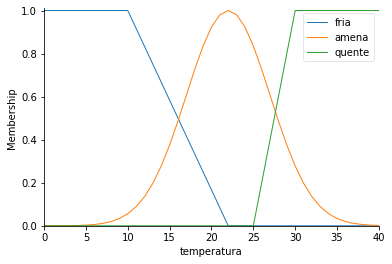

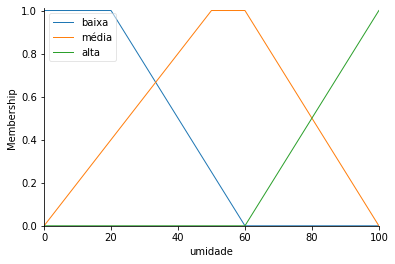

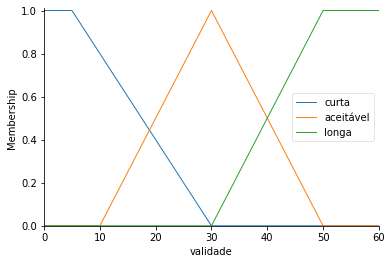

In [7]:
# [2] Fuzzificação
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#CRIAÇÃO DE VARIÁVEIS
#===============================================================================
# Criando as variáveis do problema
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura') #ANTECEDENTE
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')        #ANTECEDENTE
validade = ctrl.Consequent(np.arange(0, 61, 1), 'validade')       #CONSEQUENTE
#===============================================================================

#FUNÇÕES DE PERTINÊNCIA
#===============================================================================
# Criando as funções de pertinência para a temperatura
temperatura['fria'] = fuzz.trapmf(temperatura.universe, [0, 0,10, 22])
temperatura['amena'] = fuzz.gaussmf(temperatura.universe, 22, 5)
temperatura['quente'] = fuzz.trapmf(temperatura.universe, [25, 30, 40, 40])

# Criando as funções de pertinência para a umidade
umidade['baixa'] = fuzz.trapmf(umidade.universe, [0, 0, 20, 60])
umidade['média'] = fuzz.trapmf(umidade.universe, [0, 50, 60, 100])
umidade['alta'] = fuzz.trimf(umidade.universe, [60, 100, 100])

# Criando as funções de pertinência para validade
validade['curta'] = fuzz.trapmf(validade.universe, [0, 0, 5, 30])
validade['aceitável'] = fuzz.trimf(validade.universe, [10, 30, 50])
validade['longa'] = fuzz.trapmf(validade.universe, [30, 50, 60, 60])
#===============================================================================

# Visualizando as funções de pertinência para cada variável
#===============================================================================
temperatura.view()
umidade.view()
validade.view()
#===============================================================================

# **Inferência Fuzzy**
> Etapa na qual as proposições (regras) são definidas e depois são examinadas
paralelamente.

> Engloba:
* Definição das proposições
* Análise das regras
* Criação da região resultante

> Definição das Proposições para o Sistema Fuzzy de controle da validade.
* Base de Conhecimento/Regras
  * **SE** a temperatura é fria **E** umidade é baixa **ENTÃO** a validade é longa
  * **SE** a temperatura é quente **OU** umidade é alta **ENTÃO** a validade é curta
  * **SE** a umidade é média **ENTÃO** a validade é aceitável 
# **Defuzzificação**
> Etapa na qual as regiões resultantes são convertidas em valores para a variável de saída do sistema.

Digite a T (ºC): 10
Digite a UR (%): 10
A validade é de 45 dias


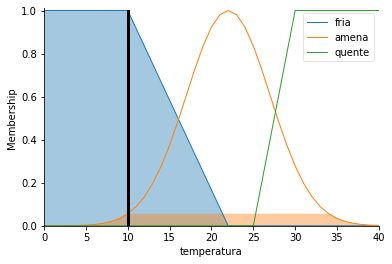

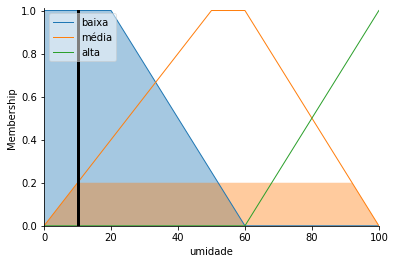

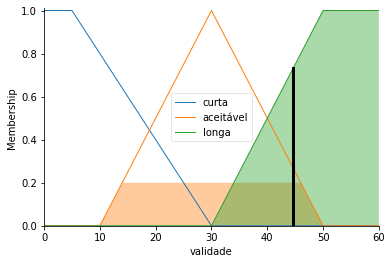

In [6]:
# [3] Inferência Fuzzy e Defuzzificação

# Base de Conhecimento/Regras
regra1 = ctrl.Rule(temperatura['fria'] & umidade['baixa'], validade['longa'])
regra2 = ctrl.Rule(temperatura['quente'] | umidade['alta'], validade['curta'])
regra3 = ctrl.Rule(umidade['média'], validade['aceitável'])

# Sistema Fuzzy e Simulação
validade_ctrl = ctrl.ControlSystem([regra1, regra2, regra3])
validade_simulador = ctrl.ControlSystemSimulation(validade_ctrl)


# Entranda da temperatura
while True:
  temp = float(input('Digite a T (ºC): '))
  if(temp<0 or temp >40):
    print('A temperatura deve estar no intervalo [0, 40]')
    continue
  validade_simulador.input['temperatura'] = temp
  break

# Entrada da umidade relativa  
while True:
  ur = float(input('Digite a UR (%): '))
  if(ur<0 or temp >100):
    print('A umidade deve estar no intervalo [0, 100]')
    continue
  validade_simulador.input['umidade'] = ur
  break

# Computando o resultado (Inferência Fuzzy + Defuzzificação)
validade_simulador.compute()
print('A validade é de %d dias' % round(validade_simulador.output['validade']))

# Visualizando as regiões
temperatura.view(sim=validade_simulador)
umidade.view(sim=validade_simulador)
validade.view(sim=validade_simulador)

